# Neuronale Netze: digits datset

Dieses Jupyter Notebook führt die Ergebnisse des dritten Projektes im Modul Special Engineering (M30) zum Thema Neuronale Netze auf. Als Datenset wird das digits Datenset verwendet.

In [39]:
###############################################################################
# Digits Dataset: Logistische Regression
# Sidney Göhler 544131
#### IKT (M)
# Special Engineering SoSe20
# Prof. Dr. Andreas Zeiser
###############################################################################
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

from sklearn.datasets import load_digits

from sklearn.model_selection import GridSearchCV, ParameterGrid, train_test_split, StratifiedKFold, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score

import time
import pandas as pd
import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import activations

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping #, TensorBoard



#from scipy.stats.kde import gaussian_kde
from scipy.stats import kde, distributions
##########################
#import helperfunctions
from helper import plotactivationfunctions

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
tf.keras.__version__

'2.3.0-tf'

Die Vorhersagekraft des Neuronalen Netzes kann unter anderem von der verwendeten Bibliothek abhängig sein.

In [3]:
####################
# load datasets
####################
dataset = load_digits()
#print(dataset.DESCR, '\n', '\n')
X = dataset.data
y = dataset.target

targets = dataset.target_names
images = dataset.images



### Visualisieren von einzelnen Ziffern
Nachdem das Datenset geladen wurde, können vereinzelte Zahlen illustriert werden.

digit = 0 at index = 0


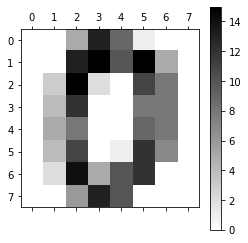

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]



digit = 0 at index = 20


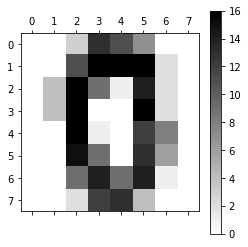

[[ 0.  0.  3. 13. 11.  7.  0.  0.]
 [ 0.  0. 11. 16. 16. 16.  2.  0.]
 [ 0.  4. 16.  9.  1. 14.  2.  0.]
 [ 0.  4. 16.  0.  0. 16.  2.  0.]
 [ 0.  0. 16.  1.  0. 12.  8.  0.]
 [ 0.  0. 15.  9.  0. 13.  6.  0.]
 [ 0.  0.  9. 14.  9. 14.  1.  0.]
 [ 0.  0.  2. 12. 13.  4.  0.  0.]]



digit = 8 at index = 500


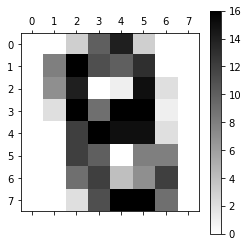

[[ 0.  0.  3. 10. 14.  3.  0.  0.]
 [ 0.  8. 16. 11. 10. 13.  0.  0.]
 [ 0.  7. 14.  0.  1. 15.  2.  0.]
 [ 0.  2. 16.  9. 16. 16.  1.  0.]
 [ 0.  0. 12. 16. 15. 15.  2.  0.]
 [ 0.  0. 12. 10.  0.  8.  8.  0.]
 [ 0.  0.  9. 12.  4.  7. 12.  0.]
 [ 0.  0.  2. 11. 16. 16.  9.  0.]]



digit = 8 at index = 508


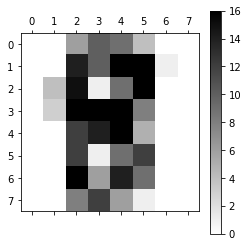

[[ 0.  0.  6. 10.  9.  4.  0.  0.]
 [ 0.  0. 14. 10. 16. 16.  1.  0.]
 [ 0.  4. 15.  1.  9. 16.  0.  0.]
 [ 0.  3. 16. 16. 16.  8.  0.  0.]
 [ 0.  0. 12. 14. 16.  5.  0.  0.]
 [ 0.  0. 12.  1.  9. 12.  0.  0.]
 [ 0.  0. 16.  6. 14.  9.  0.  0.]
 [ 0.  0.  8. 12.  6.  1.  0.  0.]]



digit = 5 at index = 1700


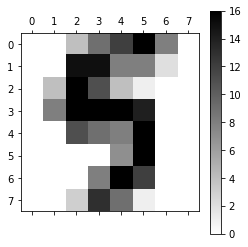

[[ 0.  0.  4.  9. 12. 16.  8.  0.]
 [ 0.  0. 15. 15.  8.  8.  2.  0.]
 [ 0.  4. 16. 11.  4.  1.  0.  0.]
 [ 0.  8. 16. 16. 16. 14.  0.  0.]
 [ 0.  0. 11.  9.  8. 16.  0.  0.]
 [ 0.  0.  0.  0.  7. 16.  0.  0.]
 [ 0.  0.  0.  8. 16. 12.  0.  0.]
 [ 0.  0.  3. 13.  9.  1.  0.  0.]]



digit = 5 at index = 1787


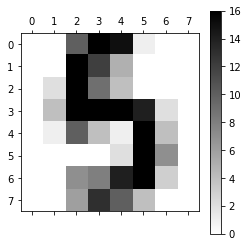

[[ 0.  0. 10. 16. 15.  1.  0.  0.]
 [ 0.  0. 16. 12.  5.  0.  0.  0.]
 [ 0.  2. 16.  9.  4.  0.  0.  0.]
 [ 0.  4. 16. 16. 16. 14.  2.  0.]
 [ 0.  1. 10.  4.  1. 16.  4.  0.]
 [ 0.  0.  0.  0.  2. 16.  7.  0.]
 [ 0.  0.  7.  8. 14. 16.  3.  0.]
 [ 0.  0.  6. 13. 10.  4.  0.  0.]]





In [4]:
for ind in [0,20,500,508,1700,1787]:
    print(f'digit = {y[ind]} at index = {ind}')
    plt.matshow(images[ind], cmap = cm.gray_r)
    plt.colorbar()
    plt.show()
    print(f'{images[ind]}\n\n\n')

Zu sehen ist, dass die selben Ziffern häufig minimale Unterschiede untereinander haben. Die Zeilen 3 und 4 wirken stark frequentiert, hingegen die Spalten 0 und 7 sehr schwach.

Anzumerken ist noch, dass die Features des Datensets, aufgrund der Tatsache, dass es sich ausschlißelich um Helligkeitswerte handelt, bereits skaliert sind.
Ein erneutes skalieren ist somit nicht unbedingt Notwendig aber dennoch ratsam, da das Gradientenabstiegsverfahren wohl deutlich schneller Konvergiert.
https://en.wikipedia.org/wiki/Feature_scaling#cite_note-1

# Feature Vorverarbeitung

Bei den Fetures handelt es ausschließlich um numerische Features welche von 0 bis 16 skaliert sind. Es bietet sich an, den Werteberech aufgrund der Tatsache, dass Gradientbasierte Optimierungsverfahren etwas schneller konvergieren können, die Features auf den Wertebereich [0;1] zu skalieren.

In [ ]:
#scale to 0...1
X = X/16

Anschließend wird das Datenset in Trainingsdate, Testdaten und Validierungsdaten aufgeteilt.

In [6]:
####################
# split dataset (60:20:20)
####################


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

print('trainset ',np.shape(X_train),np.shape(y_train),
      '\ntestset ', np.shape(X_test),np.shape(y_test),
      '\nvalidationset ',np.shape(X_val),np.shape(y_val))

trainset  (1078, 64) (1078,) 
testset  (359, 64) (359,) 
validationset  (360, 64) (360,)


# Hyperparameter des neuronalen Netzes

Das Neuronale Netz wird per Backprobation Verfahren trainiert, was bedeutet, dass auf Basis der Differenz zwischen Output und Input mithilfe eines Algorithmus versucht wird, diese Differenz (Kosten) zu minimieren. Bekannt ist bereits das Gradientenabstiegsverfahren, es haben sich aber über die Jahre weitere, oft effizientere Verfahren, herauskristalisiert (z.B. Adam https://arxiv.org/abs/1412.6980).

ss

C:\Users\sigoehler\Documents\Uni\Uni\python\ann\helper.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem([0],[0.1], '-.')


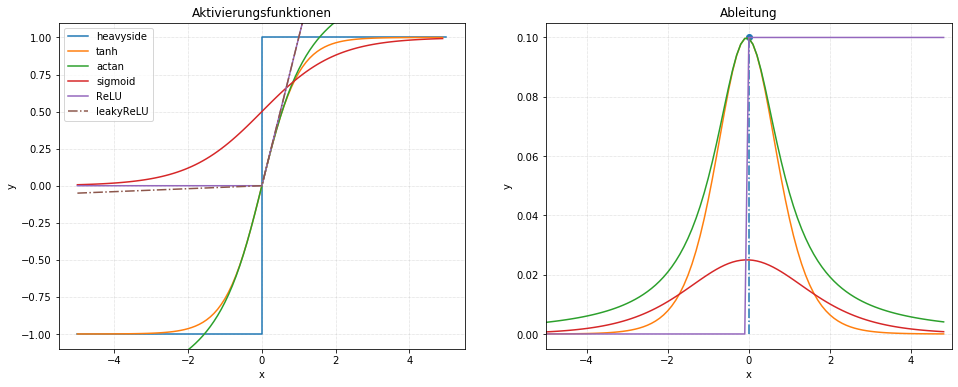

In [7]:
#plot activation functions
plotactivationfunctions()


Lineare Aktivierungsfunktionen unterliegen einer starken Beschränkung, da eine Komposition linearer Funktionen durch arithmetische Umformungen durch eine einzige lineare Funktion dargestellt werden kann. Für mehrschichtige Verbindungsnetzwerke sind sie deswegen nicht geeignet und finden so nur in einfachen Modellen Anwendung. 

Folgende Hyperparameter werden untersucht:
- dropout
- Patience
- Lernrate
- momentum
- Anzahl der Hidden Layer
- Anzahl der Neuronen je Hidden Layer
- die Größe eines Batches

TypeError: __call__() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [19]:
#https://keras.io/api/layers/regularizers/
#https://keras.io/api/layers/normalization_layers/batch_normalization/
#https://keras.io/api/layers/regularization_layers/dropout/
#https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
#https://keras.io/api/layers/regularization_layers/activity_regularization/
#https://keras.io/api/layers/core_layers/activation/
#https://keras.io/api/losses/


loss_fn = keras.losses.SparseCategoricalCrossentropy()

def create_model(n_hidden_layer=1, n_neurons_per_layer=32, learning_rate=5e-4, momentum=0.9, dropout=0.2, batch_size = 4, patience = 10, optimizer="SGD"):
    model = Sequential()
    
    model_path = "!digit_classifier_{}.h5".format(time.time())
    #https://datascience.stackexchange.com/questions/12532/does-batch-size-in-keras-have-any-effects-in-results-quality
    #nb_batch_size = round(len(X_train) / nb_batches)
    
    #inputlayer
    model.add(layers.Dense(64, activation='relu', input_shape=(64,)))
    
    #hiddenlayer
    for lay in range(n_hidden_layer):
        model.add(layers.BatchNormalization(momentum=momentum))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(n_neurons_per_layer, activation='relu', activity_regularizer=regularizers.l2(learning_rate)))
    
    #outpulayer
    model.add(layers.BatchNormalization(momentum=momentum))
    model.add(layers.Dense(10, activation='softmax'))
    
    
    
    model.compile(loss=loss_fn,
             optimizer=optimizer,
             metrics=["accuracy"])

    
    checkpointer = ModelCheckpoint(filepath=model_path,
                               verbose=0,
                               save_best_only=True)

    early_stopping = EarlyStopping(patience=patience,
                               verbose=0,
                               restore_best_weights=True)
    
    return model, checkpointer, early_stopping

nb_epoch = 1000

Nach dem sehr langwierigen Gridsearch Verfahren (>2d) kann die Parameterkonfiguration mit dem höchsten score ermittelt werden. Um die Rechenzeiten zuknftig zu reduzieren bietet es sich ggf. an entweder nicht so viele Hyperparameterkombinationen gleichzeitig zu testen, oder auf andere Verfahren, wie z.B. das Randomizedsearch Verfahren zurückzugreifen.

Da der Gridsearch Algorithmus auf einem anderen Rechner lief hab ich die Hyperparameter hier manuell eingetragen.

In [9]:
# best params estimated with GS
bestparams = {
    "dropout" : 0.2,
    "learning_rate": 0.0005,
    "momentum": 0.999,
    "n_hidden_layer": 4,
    "n_neurons_per_layer": 200, 
    "batch_size" : 11,
    "patience" : 50
}


Anzumerken ist hier noch, dass besonders die Lernrate als auch die Batchsize, also mit wie vielen Trainingsinstanzen der Gradient bestimmt werden soll, einen starken Einfluss auf die Modellqualität haben.
Im Großen und Ganzen ergiebt sich die Vorhersagekraft aber aus der Kombination aller Hyperparameter.

Der Hyperparameter patience besagt nach wie vielen Epochen ohne weiteren Fortschritt abgebrochen werden soll, wobei hier die Gefahr besteht, dass der Algorithmus zu früh abbricht, da der Grdientabstieg zwar ~0 ist aber noch kein Minima gefunden wurde (Er befindet sich auf einem Plateau).

Anschließend kann ein Neuronales Netz auf Basis der ermittelten Parameter erzeugt werden.

In [57]:
bestmodel, checkpointer, early_stopping = create_model(**bestparams)
bestmodel.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_45 (Batc (None, 64)                256       
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 200)               13000     
_________________________________________________________________
batch_normalization_46 (Batc (None, 200)               800       
_________________________________________________________________
dropout_37 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 200)              

# Training mit dem gesamten Trainingsdatenset

Nachfolgend werden die Parameter des Neuronale Netz mit dem gesammten Trainingsdatenset berechnet.

In [ ]:
time_start = time.time()

history = bestmodel.fit(X_train, y_train, epochs=nb_epoch,
                    shuffle=True,
                    batch_size=bestparams['batch_size'],
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[checkpointer, early_stopping])

print(f'took {time.time()-time_start} seconds..\n')


Epoch 1/1000
98/98 [==============================] - 1s 10ms/step - loss: 1.9001 - accuracy: 0.4499 - val_loss: 2.1962 - val_accuracy: 0.4333
Epoch 2/1000
98/98 [==============================] - 0s 5ms/step - loss: 1.0536 - accuracy: 0.7393 - val_loss: 2.0952 - val_accuracy: 0.5167
Epoch 3/1000
98/98 [==============================] - 1s 6ms/step - loss: 0.9372 - accuracy: 0.7764 - val_loss: 2.0146 - val_accuracy: 0.5722
Epoch 4/1000
98/98 [==============================] - 0s 5ms/step - loss: 0.8668 - accuracy: 0.7922 - val_loss: 1.9428 - val_accuracy: 0.5361
Epoch 5/1000
98/98 [==============================] - 0s 5ms/step - loss: 0.8134 - accuracy: 0.8284 - val_loss: 1.8848 - val_accuracy: 0.5056
Epoch 6/1000
98/98 [==============================] - 0s 5ms/step - loss: 0.7735 - accuracy: 0.8293 - val_loss: 1.8102 - val_accuracy: 0.4417
Epoch 7/1000
98/98 [==============================] - 0s 5ms/step - loss: 0.7423 - accuracy: 0.8395 - val_loss: 1.7270 - val_accuracy: 0.5583
Epoch

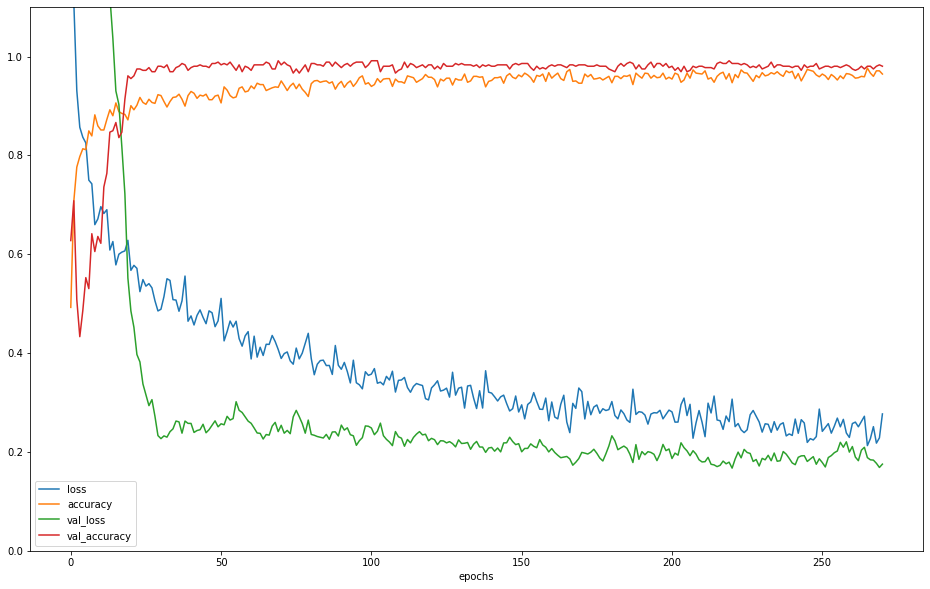

In [12]:
fig = plt.figure(figsize=(16,10))
df = pd.DataFrame(history.history)

plt.ylim(0,1.1)
plt.xlabel('epochs')
plt.plot(df)
plt.legend(df.columns)
plt.show()

In [37]:
df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

Zu sehen sind der loss und der accuracy Wert der Trainingsdaten und Validierungsdaten je Epoche.

# Vorhersagungen auf den Testdatensätzen und Metriken

Nachfolgen werden die Testdatensätze mithilfe des resultierenden Neuronalen Netzes verhergesagt. Anzumerken ist, dass das Neuronal Netz 

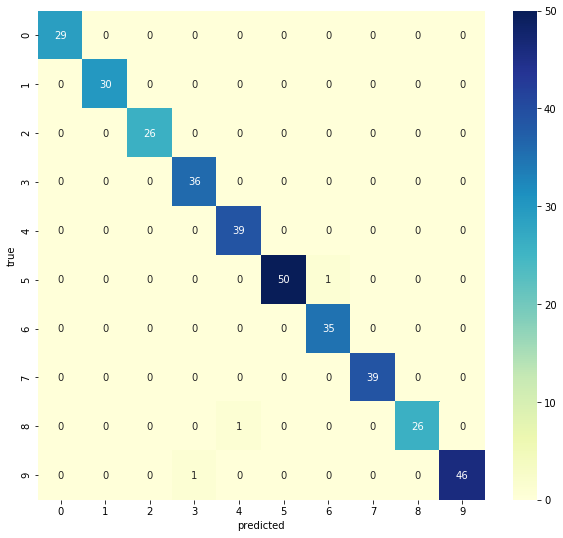

In [13]:
predictions = bestmodel.predict(X_test)

y_pred = np.zeros(np.shape(y_test))

for ind, pred in enumerate(predictions):
    y_pred[ind] = np.argmax(pred)
    
cnf_matrix = confusion_matrix(y_test,y_pred)

fig = plt.figure(figsize=(10,9))
sns.heatmap(cnf_matrix, cmap='YlGnBu', annot=True)
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

In [14]:
print(classification_report(y_test, y_pred, output_dict=False))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        26
           3       0.97      1.00      0.99        36
           4       0.97      1.00      0.99        39
           5       1.00      0.98      0.99        51
           6       0.97      1.00      0.99        35
           7       1.00      1.00      1.00        39
           8       1.00      0.96      0.98        27
           9       1.00      0.98      0.99        47

    accuracy                           0.99       359
   macro avg       0.99      0.99      0.99       359
weighted avg       0.99      0.99      0.99       359



Nachfolgend werden zum vergleich nocheinmal die mittels Logistischer Regression ermittelten Metriken aufgeführt.

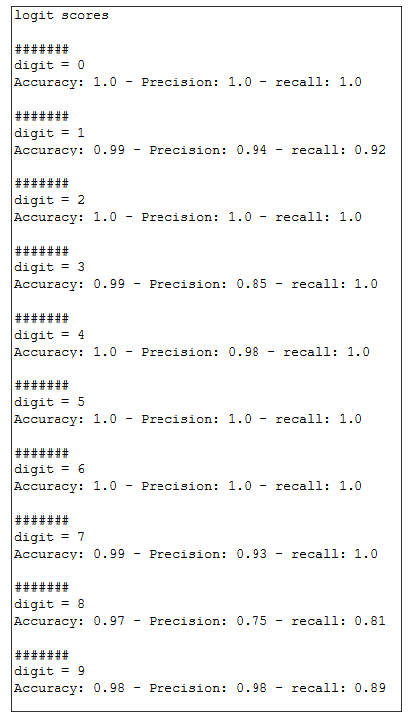

In [15]:
fig = plt.figure(figsize=(7,14))
img=mpimg.imread('logitscores.png')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

Zu sehen ist, dass das Neuronale Netz dem Logistischen Klassifizierer bei fast allen digits überlegen ist. Zu erwähnen ist aber auch, dass das trainieren des Neuronalen Netzes deutlich länger dauert.

Logistische Regression: ~65s für 74067 Iterationen

Neuronale Netz: ~132s für 26558‬ Iterationen


# Visualisieren der falsch Klassifizierten Zahlen
Das resutierende Neuronale Netz hat im Grunde ca. 99% der Ziffern richtig klassifiziert.
Nachfolgend werden die falsch Klassifizierten Zahlen mit der berechneten Wahrscheinlichkeit und die eigentliche Klasse illustriert.

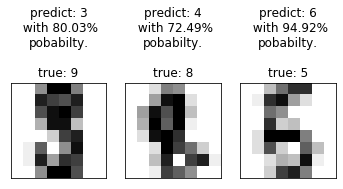

In [16]:
# Plot
f = plt.figure(figsize=(12, 12))
ind  =0
mask = y_test != y_pred

for i, d in enumerate(X_test):
    if mask[i]:
        #print(i, y_test[i],y_pred[i])
        img = d.reshape(8,8)
        sub = f.add_subplot(3, 6, ind+1)
        sub.imshow(img, cmap=cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        sub.set_title(f'predict: {int(y_pred[i])}\n with {np.max(predictions[i]*100):.4}%\npobabilty.\n\ntrue: {y_test[i]}')
        ind=ind+1

Auffällig ist, dass das resultierende Neuronal Netz aktuell anscheinend Probleme hat die Ziffer 5 zu erkennen.

# Kennzeichnen von falsch klassifizierten Zahlen



In [56]:
loss_test = []
loss_train= []
loss_val  = []

over = range(1,1050,20)

print(f'learning curve...')

for d in over:
    X_train_lc = X_train[:d]
    y_train_lc = y_train[:d]

    
    bestmodel, checkpointer, early_stopping = create_model(**bestparams)

    
    history = bestmodel.fit(X_train, y_train, epochs=nb_epoch,
                    shuffle=True,
                    batch_size=bestparams['batch_size'],
                    validation_data=(X_val, y_val),
                    verbose=0,
                    callbacks=[checkpointer, early_stopping])
    
    

    predictions = bestmodel.predict(X_test)

    y_pred = np.zeros(np.shape(y_test))
    
    for ind, pred in enumerate(predictions):
        y_pred[ind] = np.argmax(pred)

    #print(np.shape(y_pred), np.shape(y_test))
    loss = loss_fn(y_test, y_pred)
    
    loss_test.append(loss)
    loss_train.append(np.mean(history.history['loss']))
    loss_val.append(np.mean(history.histoy['val_loss']))

    print(f'Calculating for {d} samples done... took {1}')

learning curve...


ValueError: Shape mismatch: The shape of labels (received (359,)) should equal the shape of logits except for the last dimension (received (1, 359)).

In [ ]:
data = {'loss_test':loss_test,
        'loss_val':loss_val,
        'loss_train':loss_train
}

fig = plt.figure(figsize=(16,10))
df = pd.DataFrame(data)

#plt.ylim(0,1.1)
plt.xlabel('trainingset size')
plt.plot(df)
plt.legend(df.columns)
plt.show()
